# Importing required modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.combine import SMOTETomek
from collections import Counter
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,f1_score,classification_report
from sklearn.feature_selection import RFE
from sklearn.impute import KNNImputer
from sklearn import svm
import warnings
warnings.filterwarnings('ignore')

# Reading csv file

In [2]:
df=pd.read_csv('/Users/hp/Downloads/kidney_disease.csv')

# EDA - Exploratory Data Analysis

In [3]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

<AxesSubplot:>

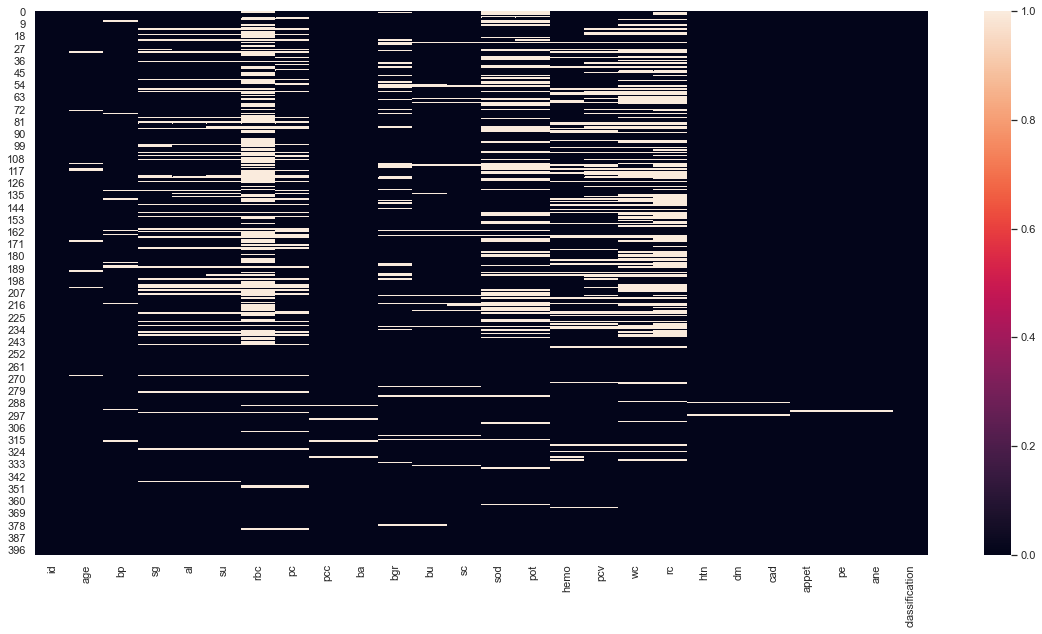

In [5]:
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(df.isnull())

In [6]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

# Data Cleaning 

In [8]:
print('Packed cell volume unique values: ',df['pcv'].unique(), sep="\n\n")

Packed cell volume unique values: 

['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54']


In [9]:
print('White blood cell count unique values: ',df['wc'].unique(), sep="\n\n")

White blood cell count unique values: 

['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '\t6200' '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'
 '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'
 '12400' '\t8400' '10500' '4200' '4700' '10900' '8100' '9500' '2200'
 '12800' '11200' '19100' '\t?' '12300' '16700' '2600' '26400' '8800'
 '7400' '4900' '8000' '12000' '15700' '4100' '5700' '11500' '5400' '10800'
 '9900' '5200' '5900' '9300' '9700' '5100' '6600']


In [10]:
print('Red blood cell count unique values: ',df['rc'].unique(), sep="\n\n")

Red blood cell count unique values: 

['5.2' nan '3.9' '4.6' '4.4' '5' '4.0' '3.7' '3.8' '3.4' '2.6' '2.8' '4.3'
 '3.2' '3.6' '4' '4.1' '4.9' '2.5' '4.2' '4.5' '3.1' '4.7' '3.5' '6.0'
 '5.0' '2.1' '5.6' '2.3' '2.9' '2.7' '8.0' '3.3' '3.0' '3' '2.4' '4.8'
 '\t?' '5.4' '6.1' '6.2' '6.3' '5.1' '5.8' '5.5' '5.3' '6.4' '5.7' '5.9'
 '6.5']


Converting the columns pcv, wc, rc from datatype object to datatype float64

In [11]:
df['pcv'] = pd.to_numeric(df['pcv'],errors="coerce")
df['wc'] = pd.to_numeric(df['wc'],errors="coerce")
df['rc'] = pd.to_numeric(df['rc'],errors="coerce")

In [12]:


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             329 non-null    float64
 17  wc              294 non-null    flo

In [13]:
numeric_feature=[col for col in df.columns if df[col].dtypes!='O']

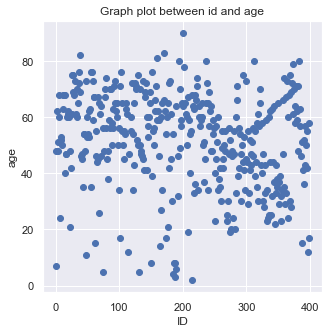

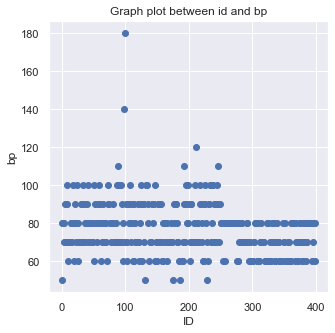

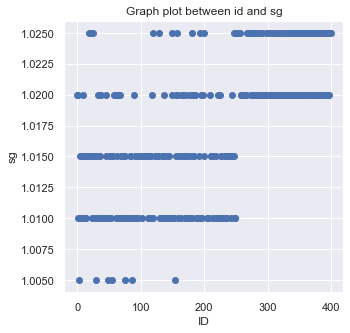

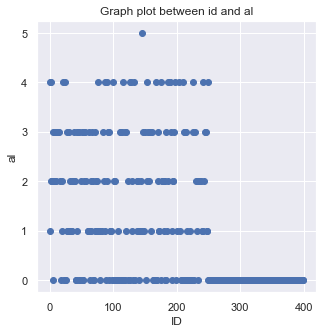

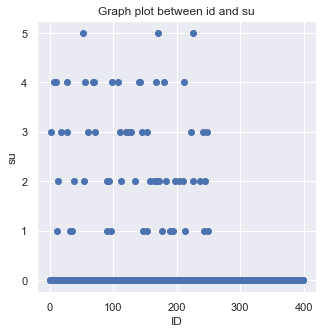

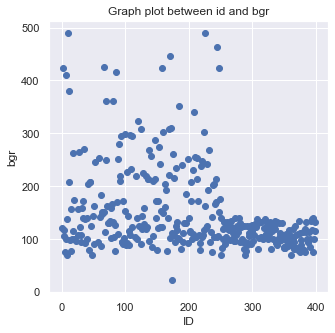

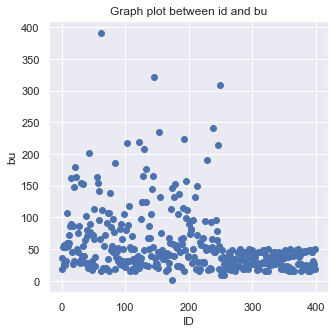

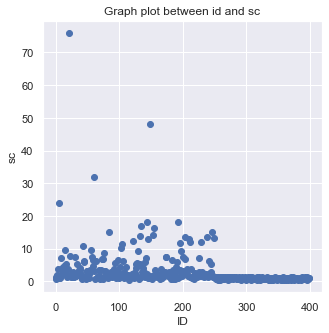

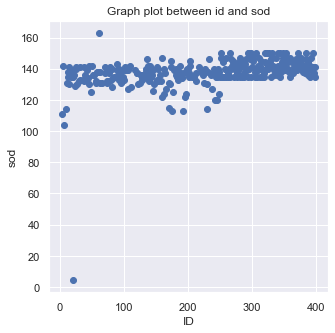

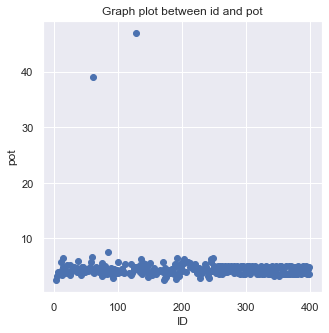

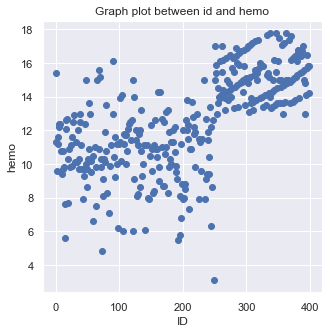

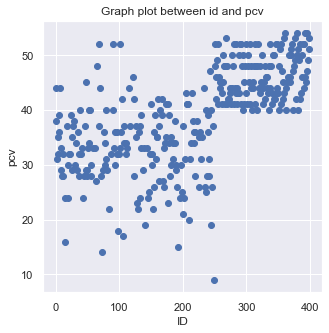

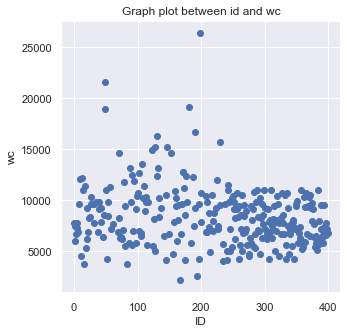

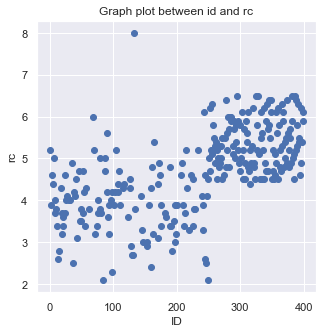

In [14]:
for feature in numeric_feature[1:]:
        plt.figure(figsize=(5,5))
        plt.scatter(df['id'],df[feature])
        plt.xlabel('ID')
        plt.ylabel(feature)
        plt.title('Graph plot between id and '+feature)
        plt.show()

Acc to graph plot we can find outliers but according to medical and record available only sod and pot value are invalid rest outliers are valid

In [15]:
print("Sodium outliers values: ")
for val in df['sod']:
    if val<=20.0:
        print(val)

Sodium outliers values: 
4.5


In [16]:
print("Potassium outliers value: ")
for val in df['pot']:
    if val>=20.0:
        print(val)

Potassium outliers value: 
39.0
47.0


Replacing outliers values of sod, pot with nan value

In [17]:
df['pot']=df['pot'].replace([39,47],np.nan)
df['sod']=df['sod'].replace([4.5],np.nan)

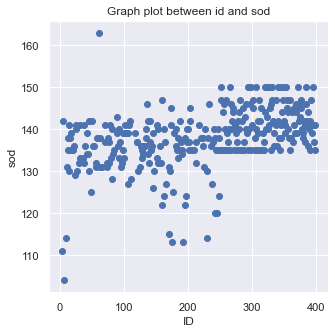

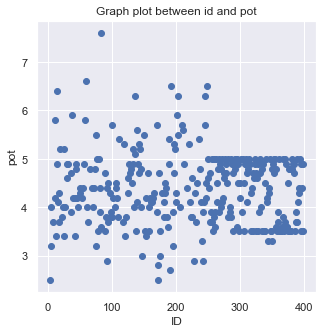

In [18]:
for feature in ['sod', 'pot']:
        plt.figure(figsize=(5,5))
        plt.scatter(df['id'],df[feature])
        plt.xlabel('ID')
        plt.ylabel(feature)
        plt.title('Graph plot between id and '+feature)
        plt.show()

# Splitting of Dataset into train and test data

In [19]:
x=df.drop(columns=['id','classification'], axis=1)
y=df['classification']

In [20]:
x.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,11.3,38.0,6000.0,NaN,no,no,no,good,no,no
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,11.6,35.0,7300.0,4.6,no,no,no,good,no,no


In [21]:
y

0         ckd
1         ckd
2         ckd
3         ckd
4         ckd
        ...  
395    notckd
396    notckd
397    notckd
398    notckd
399    notckd
Name: classification, Length: 400, dtype: object

In [22]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)

In [23]:
print("Xtrain Shape: ", xtrain.shape)
print("Xtest Shape: ", xtest.shape)

Xtrain Shape:  (280, 24)
Xtest Shape:  (120, 24)


# Handling Missing Values using KNNImputer 

In [24]:
xtrain.isnull().sum()

age        5
bp         9
sg        36
al        35
su        38
rbc      107
pc        50
pcc        4
ba         4
bgr       33
bu        14
sc        12
sod       68
pot       70
hemo      39
pcv       51
wc        78
rc        94
htn        1
dm         1
cad        1
appet      0
pe         0
ane        0
dtype: int64

In [25]:
numeric_feature=numeric_feature[1:]
knn=KNNImputer(n_neighbors=2)
df2=knn.fit_transform(xtrain[numeric_feature])
xtrain[numeric_feature]=df2
xtrain

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
157,62.0,70.0,1.0250,3.0,0.0,normal,abnormal,notpresent,notpresent,122.0,...,12.6,39.0,7900.0,3.90,yes,yes,no,good,no,no
109,54.0,70.0,1.0150,0.0,0.0,NaN,NaN,notpresent,notpresent,233.0,...,11.7,42.0,10600.0,5.15,no,yes,no,good,no,no
17,47.0,80.0,1.0175,1.0,0.0,NaN,NaN,notpresent,notpresent,114.0,...,12.1,37.0,6750.0,4.30,yes,no,no,poor,no,no
347,43.0,60.0,1.0250,0.0,0.0,normal,normal,notpresent,notpresent,108.0,...,17.8,43.0,7200.0,5.50,no,no,no,good,no,no
24,42.0,100.0,1.0150,4.0,0.0,normal,abnormal,notpresent,present,138.0,...,11.1,39.0,8300.0,4.60,yes,no,no,poor,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,46.0,60.0,1.0100,1.0,0.0,normal,normal,notpresent,notpresent,163.0,...,9.8,28.0,14600.0,3.20,yes,yes,no,good,no,no
106,50.0,90.0,1.0200,1.5,1.0,NaN,NaN,notpresent,notpresent,89.0,...,6.0,17.0,6500.0,4.20,yes,yes,no,good,yes,yes
270,23.0,80.0,1.0250,0.0,0.0,normal,normal,notpresent,notpresent,111.0,...,14.3,41.0,7200.0,5.00,no,no,no,good,no,no
348,38.0,80.0,1.0200,0.0,0.0,normal,normal,notpresent,notpresent,99.0,...,13.6,44.0,7300.0,6.40,no,no,no,good,no,no


In [26]:
xtrain.isnull().sum()

age        0
bp         0
sg         0
al         0
su         0
rbc      107
pc        50
pcc        4
ba         4
bgr        0
bu         0
sc         0
sod        0
pot        0
hemo       0
pcv        0
wc         0
rc         0
htn        1
dm         1
cad        1
appet      0
pe         0
ane        0
dtype: int64

In [27]:
for feature in df.columns:
    if (df[feature].dtype)=='O':
        print(feature,": ",df[feature].unique())

rbc :  [nan 'normal' 'abnormal']
pc :  ['normal' 'abnormal' nan]
pcc :  ['notpresent' 'present' nan]
ba :  ['notpresent' 'present' nan]
htn :  ['yes' 'no' nan]
dm :  ['yes' 'no' ' yes' '\tno' '\tyes' nan]
cad :  ['no' 'yes' '\tno' nan]
appet :  ['good' 'poor' nan]
pe :  ['no' 'yes' nan]
ane :  ['no' 'yes' nan]
classification :  ['ckd' 'ckd\t' 'notckd']


In [28]:
datamaping1={
    'ckd':1,
    'notckd':0,
    'ckd\t':1
}
ytrain=ytrain.map(datamaping1)

datamaping2={
    'abnormal':1,
    'normal':0
}
xtrain['rbc']=xtrain['rbc'].map(datamaping2)
xtrain['pc']=xtrain['pc'].map(datamaping2)

datamaping3={
    'notpresent':0,
    'present':1
}
xtrain['pcc']=xtrain['pcc'].map(datamaping3)
xtrain['ba']=xtrain['ba'].map(datamaping3)

datamaping4={
    'yes':1,
    'no':0
}
xtrain['htn']=xtrain['htn'].map(datamaping4)

datamaping5={
    'yes':1,
    'no':0,
    '\tyes':1,
    '\tno':0,
    ' yes':1
}
xtrain['dm']=xtrain['dm'].map(datamaping5)
xtrain['cad']=xtrain['cad'].map(datamaping5)
xtrain['pe']=xtrain['pe'].map(datamaping5)
xtrain['ane']=xtrain['ane'].map(datamaping5)

datamaping6={
    'good':0,
    'poor':1
}
xtrain['appet']=xtrain['appet'].map(datamaping6)


In [29]:
xtrain.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
157,62.0,70.0,1.0250,3.0,0.0,0.0,1.0,0.0,0.0,122.0,...,12.6,39.0,7900.0,3.90,1.0,1.0,0.0,0,0,0
109,54.0,70.0,1.0150,0.0,0.0,NaN,NaN,0.0,0.0,233.0,...,11.7,42.0,10600.0,5.15,0.0,1.0,0.0,0,0,0
17,47.0,80.0,1.0175,1.0,0.0,NaN,NaN,0.0,0.0,114.0,...,12.1,37.0,6750.0,4.30,1.0,0.0,0.0,1,0,0
347,43.0,60.0,1.0250,0.0,0.0,0.0,0.0,0.0,0.0,108.0,...,17.8,43.0,7200.0,5.50,0.0,0.0,0.0,0,0,0
24,42.0,100.0,1.0150,4.0,0.0,0.0,1.0,0.0,1.0,138.0,...,11.1,39.0,8300.0,4.60,1.0,0.0,0.0,1,0,0


In [30]:
ytrain

157    1
109    1
17     1
347    0
24     1
      ..
71     1
106    1
270    0
348    0
102    1
Name: classification, Length: 280, dtype: int64

In [31]:
knn_cat=KNNImputer(n_neighbors=1)
df3=knn_cat.fit_transform(xtrain)
xtrain[xtrain.columns]=df3
xtrain

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
157,62.0,70.0,1.0250,3.0,0.0,0.0,1.0,0.0,0.0,122.0,...,12.6,39.0,7900.0,3.90,1.0,1.0,0.0,0.0,0.0,0.0
109,54.0,70.0,1.0150,0.0,0.0,0.0,0.0,0.0,0.0,233.0,...,11.7,42.0,10600.0,5.15,0.0,1.0,0.0,0.0,0.0,0.0
17,47.0,80.0,1.0175,1.0,0.0,0.0,0.0,0.0,0.0,114.0,...,12.1,37.0,6750.0,4.30,1.0,0.0,0.0,1.0,0.0,0.0
347,43.0,60.0,1.0250,0.0,0.0,0.0,0.0,0.0,0.0,108.0,...,17.8,43.0,7200.0,5.50,0.0,0.0,0.0,0.0,0.0,0.0
24,42.0,100.0,1.0150,4.0,0.0,0.0,1.0,0.0,1.0,138.0,...,11.1,39.0,8300.0,4.60,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,46.0,60.0,1.0100,1.0,0.0,0.0,0.0,0.0,0.0,163.0,...,9.8,28.0,14600.0,3.20,1.0,1.0,0.0,0.0,0.0,0.0
106,50.0,90.0,1.0200,1.5,1.0,0.0,0.0,0.0,0.0,89.0,...,6.0,17.0,6500.0,4.20,1.0,1.0,0.0,0.0,1.0,1.0
270,23.0,80.0,1.0250,0.0,0.0,0.0,0.0,0.0,0.0,111.0,...,14.3,41.0,7200.0,5.00,0.0,0.0,0.0,0.0,0.0,0.0
348,38.0,80.0,1.0200,0.0,0.0,0.0,0.0,0.0,0.0,99.0,...,13.6,44.0,7300.0,6.40,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
xtrain.isnull().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wc       0
rc       0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
dtype: int64

Applying imputation for test data

In [33]:
xtest.isnull().sum()

age       4
bp        3
sg       11
al       11
su       11
rbc      45
pc       15
pcc       0
ba        0
bgr      11
bu        5
sc        5
sod      20
pot      20
hemo     13
pcv      20
wc       28
rc       37
htn       1
dm        1
cad       1
appet     1
pe        1
ane       1
dtype: int64

In [34]:
knn_test=KNNImputer(n_neighbors=2)
df4=knn_test.fit_transform(xtest[numeric_feature])
xtest[numeric_feature]=df4
xtest

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
209,19.0,70.0,1.0200,0.0,0.0,NaN,normal,notpresent,notpresent,98.5,...,11.50,44.0,6900.0,4.20,no,no,no,good,no,no
280,47.0,80.0,1.0125,2.5,0.0,NaN,NaN,notpresent,notpresent,93.0,...,13.30,52.0,8100.0,5.20,no,no,no,good,no,no
33,60.0,100.0,1.0200,2.0,0.0,abnormal,abnormal,notpresent,notpresent,140.0,...,10.10,29.0,9450.0,5.45,yes,no,no,poor,no,no
210,59.0,100.0,1.0150,4.0,2.0,normal,normal,notpresent,notpresent,255.0,...,7.30,20.0,9800.0,3.90,yes,yes,yes,good,no,yes
93,73.0,100.0,1.0100,3.0,2.0,abnormal,abnormal,present,notpresent,295.0,...,9.20,30.0,7000.0,3.20,yes,yes,yes,poor,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,67.0,90.0,1.0200,1.0,0.0,NaN,abnormal,present,notpresent,141.0,...,11.55,34.5,9800.0,4.55,yes,no,no,good,no,no
79,56.0,80.0,1.0100,1.0,0.0,NaN,normal,notpresent,notpresent,165.0,...,13.50,40.0,11800.0,5.00,yes,yes,no,poor,yes,no
285,66.0,70.0,1.0200,0.0,0.0,normal,normal,notpresent,notpresent,94.0,...,16.00,41.0,5300.0,5.90,no,no,no,good,no,no
305,41.0,80.0,1.0200,0.0,0.0,normal,normal,notpresent,notpresent,122.0,...,17.10,41.0,9100.0,5.20,no,no,no,good,no,no


In [35]:
xtest.isnull().sum()

age       0
bp        0
sg        0
al        0
su        0
rbc      45
pc       15
pcc       0
ba        0
bgr       0
bu        0
sc        0
sod       0
pot       0
hemo      0
pcv       0
wc        0
rc        0
htn       1
dm        1
cad       1
appet     1
pe        1
ane       1
dtype: int64

In [36]:
datamaping1={
    'ckd':1,
    'notckd':0,
    'ckd\t':1
}
ytest=ytest.map(datamaping1)

datamaping2={
    'abnormal':1,
    'normal':0
}
xtest['rbc']=xtest['rbc'].map(datamaping2)
xtest['pc']=xtest['pc'].map(datamaping2)

datamaping3={
    'notpresent':0,
    'present':1
}
xtest['pcc']=xtest['pcc'].map(datamaping3)
xtest['ba']=xtest['ba'].map(datamaping3)

datamaping4={
    'yes':1,
    'no':0
}
xtest['htn']=xtest['htn'].map(datamaping4)

datamaping5={
    'yes':1,
    'no':0,
    '\tyes':1,
    '\tno':0,
    ' yes':1
}
xtest['dm']=xtest['dm'].map(datamaping5)
xtest['cad']=xtest['cad'].map(datamaping5)
xtest['pe']=xtest['pe'].map(datamaping5)
xtest['ane']=xtest['ane'].map(datamaping5)

datamaping6={
    'good':0,
    'poor':1
}
xtest['appet']=xtest['appet'].map(datamaping6)

In [37]:
xtest.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
209,19.0,70.0,1.0200,0.0,0.0,NaN,0.0,0,0,98.5,...,11.5,44.0,6900.0,4.20,0.0,0.0,0.0,0.0,0.0,0.0
280,47.0,80.0,1.0125,2.5,0.0,NaN,NaN,0,0,93.0,...,13.3,52.0,8100.0,5.20,0.0,0.0,0.0,0.0,0.0,0.0
33,60.0,100.0,1.0200,2.0,0.0,1.0,1.0,0,0,140.0,...,10.1,29.0,9450.0,5.45,1.0,0.0,0.0,1.0,0.0,0.0
210,59.0,100.0,1.0150,4.0,2.0,0.0,0.0,0,0,255.0,...,7.3,20.0,9800.0,3.90,1.0,1.0,1.0,0.0,0.0,1.0
93,73.0,100.0,1.0100,3.0,2.0,1.0,1.0,1,0,295.0,...,9.2,30.0,7000.0,3.20,1.0,1.0,1.0,1.0,0.0,0.0


In [38]:
ytest

209    1
280    0
33     1
210    1
93     1
      ..
60     1
79     1
285    0
305    0
281    0
Name: classification, Length: 120, dtype: int64

In [39]:
knn_test_cat=KNNImputer(n_neighbors=1)
df5=knn_test_cat.fit_transform(xtest)
xtest[xtest.columns]=df5
xtest

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
209,19.0,70.0,1.0200,0.0,0.0,0.0,0.0,0.0,0.0,98.5,...,11.50,44.0,6900.0,4.20,0.0,0.0,0.0,0.0,0.0,0.0
280,47.0,80.0,1.0125,2.5,0.0,0.0,0.0,0.0,0.0,93.0,...,13.30,52.0,8100.0,5.20,0.0,0.0,0.0,0.0,0.0,0.0
33,60.0,100.0,1.0200,2.0,0.0,1.0,1.0,0.0,0.0,140.0,...,10.10,29.0,9450.0,5.45,1.0,0.0,0.0,1.0,0.0,0.0
210,59.0,100.0,1.0150,4.0,2.0,0.0,0.0,0.0,0.0,255.0,...,7.30,20.0,9800.0,3.90,1.0,1.0,1.0,0.0,0.0,1.0
93,73.0,100.0,1.0100,3.0,2.0,1.0,1.0,1.0,0.0,295.0,...,9.20,30.0,7000.0,3.20,1.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,67.0,90.0,1.0200,1.0,0.0,0.0,1.0,1.0,0.0,141.0,...,11.55,34.5,9800.0,4.55,1.0,0.0,0.0,0.0,0.0,0.0
79,56.0,80.0,1.0100,1.0,0.0,1.0,0.0,0.0,0.0,165.0,...,13.50,40.0,11800.0,5.00,1.0,1.0,0.0,1.0,1.0,0.0
285,66.0,70.0,1.0200,0.0,0.0,0.0,0.0,0.0,0.0,94.0,...,16.00,41.0,5300.0,5.90,0.0,0.0,0.0,0.0,0.0,0.0
305,41.0,80.0,1.0200,0.0,0.0,0.0,0.0,0.0,0.0,122.0,...,17.10,41.0,9100.0,5.20,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
xtrain.isnull().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wc       0
rc       0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
dtype: int64

# Handling unbalanced dataset

In [41]:
ytrain.value_counts()

1    174
0    106
Name: classification, dtype: int64

In [42]:
smk=SMOTETomek(random_state=42)
xtrain_s,ytrain_s=smk.fit_resample(xtrain,ytrain)
print('Before Sampling:',Counter(ytrain))
print('After Sampling:',Counter(ytrain_s))

Before Sampling: Counter({1: 174, 0: 106})
After Sampling: Counter({1: 162, 0: 162})


# Feature Selection

In [43]:
clf=svm.SVC(kernel='linear')
rfe=RFE(estimator=clf,step=1)
rfe=rfe.fit(xtrain_s,ytrain_s)

In [44]:
selected_rfe_feature=pd.DataFrame({'Feature':list(xtrain.columns),
                                   'Ranking':rfe.ranking_ })
selected_rfe_feature.sort_values(by='Ranking')

,Feature,Ranking
11,sc,1
21,appet,1
19,dm,1
18,htn,1
17,rc,1
14,hemo,1
10,bu,1
9,bgr,1
23,ane,1
3,al,1


In [45]:
x_train_rfe=pd.DataFrame(rfe.transform(xtrain_s), columns=['bp','sg','al','bgr','bu','sc','hemo','rc','htn','dm','appet','ane'] )
x_test_rfe=pd.DataFrame(rfe.transform(xtest), columns=['bp','sg','al','bgr','bu','sc','hemo','rc','htn','dm','appet','ane'])

# Model Training and Evaluation

In [46]:
svc_rfe_model=clf.fit(x_train_rfe.values,ytrain_s.values)

In [47]:
y_predict=svc_rfe_model.predict(x_test_rfe)

In [48]:
print('Testing Accuracy:',accuracy_score(ytest,y_predict))

Testing Accuracy: 0.975


In [49]:
y_predict2=svc_rfe_model.predict(x_train_rfe)
print('Training Accuracy:',accuracy_score(ytrain_s,y_predict2))

Training Accuracy: 0.9938271604938271


In [50]:
print('Testing Confussion Matrix:',confusion_matrix(ytest,y_predict), sep="\n")
print('Training Confussion Matrix:',confusion_matrix(ytrain_s,y_predict2), sep="\n")

Testing Confussion Matrix:
[[42  2]
 [ 1 75]]
Training Confussion Matrix:
[[162   0]
 [  2 160]]


In [51]:
print("Testing Classification Report",classification_report(ytest,y_predict), sep="\n\n")

Testing Classification Report

              precision    recall  f1-score   support

           0       0.98      0.95      0.97        44
           1       0.97      0.99      0.98        76

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



In [52]:
print("Training Classification Report",classification_report(ytrain_s,y_predict2), sep="\n\n")

Training Classification Report

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       162
           1       1.00      0.99      0.99       162

    accuracy                           0.99       324
   macro avg       0.99      0.99      0.99       324
weighted avg       0.99      0.99      0.99       324



# Saving the model

In [53]:
import pickle
pickle_out=open('classifier.pkl', mode='wb')
pickle.dump(svc_rfe_model, pickle_out)
pickle_out.close()